In [ ]:
!pip3 install essentia

     |████████████████████████████████| 12.0MB 286kB/s 


In [ ]:
# first, we need to import our essentia module. It is aptly named 'essentia'!
import essentia

# as there are 2 operating modes in essentia which have the same algorithms,
# these latter are dispatched into 2 submodules:
import essentia.standard
import essentia.streaming

# let's have a look at what is in there
print(dir(essentia.standard))

# you can also do it by using autocompletion in IPython, typing "essentia.standard." and pressing Tab
    

['AfterMaxToBeforeMaxEnergyRatio', 'AllPass', 'AudioLoader', 'AudioOnsetsMarker', 'AudioWriter', 'AutoCorrelation', 'BFCC', 'BPF', 'BandPass', 'BandReject', 'BarkBands', 'BeatTrackerDegara', 'BeatTrackerMultiFeature', 'Beatogram', 'BeatsLoudness', 'BinaryOperator', 'BinaryOperatorStream', 'BpmHistogram', 'BpmHistogramDescriptors', 'BpmRubato', 'CartesianToPolar', 'CentralMoments', 'Centroid', 'ChordsDescriptors', 'ChordsDetection', 'ChordsDetectionBeats', 'ChromaCrossSimilarity', 'Chromagram', 'Chromaprinter', 'ClickDetector', 'Clipper', 'ConstantQ', 'CoverSongSimilarity', 'Crest', 'CrossCorrelation', 'CrossSimilarityMatrix', 'CubicSpline', 'DCRemoval', 'DCT', 'Danceability', 'Decrease', 'Derivative', 'DerivativeSFX', 'DiscontinuityDetector', 'Dissonance', 'DistributionShape', 'Duration', 'DynamicComplexity', 'ERBBands', 'EasyLoader', 'EffectiveDuration', 'Energy', 'EnergyBand', 'EnergyBandRatio', 'Entropy', 'Envelope', 'EqloudLoader', 'EqualLoudness', 'Extractor', 'FFT', 'FFTC', 'Fade

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
root = '/content/drive/Thesis'
query_music_path = '/content/drive/Thesis'

import pandas as pd
import sys
sys.path.append('/content/drive/Thesis')
sys.path.append('/content/drive/MIR_FINAL/songs/bass0')
sys.path.append('/content/drive/MIR_FINAL/songs/bass1')
sys.path.append('/content/drive/MIR_FINAL/songs/bass2')
sys.path.append('/content/drive/MIR_FINAL/songs/bass3')

Mounted at /content/drive


In [ ]:
import os
from essentia.standard import *
from essentia import Pool, array
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

In [ ]:
fs=44100
durInSecs=14.51
durInSecs2=12
soundsDir = ''

frameSize = 1024*2
hopSize = 512*2
#fileName = os.path.join(soundsDir, file)

#2_bassX_Billie Jean_Michael Jackson_BassGr1.wav
theYellow =  'drive/MyDrive/MIR_FINAL/songs/bass0/2_bassX_Yellow_Coldplay_Bass Gr0.wav'

theyellow1 =  'drive/MyDrive/TrinityRecordings/yellow1.wav'
theyellow2 =  'drive/MyDrive/TrinityRecordings/yellow2.wav'
theyellow3 =  'drive/MyDrive/TrinityRecordings/yellow3.wav'
theyellows =  'drive/MyDrive/TrinityRecordings/yellow_smooth.wav'


In [ ]:
#Student Scores
theyellowOffset1 = 85
theyellowOffset2 = 70
theyellowOffset3 = 70
theyellowOffset_s = 100

theyellowOnset1 = 55
theyellowOnset2 = 85
theyellowOnset3 = 55
theyellowOnset_s = 100

therepeated1 = 60
therepeated2 = 85 
therepeated3 = 70
therepeateds = 100

thesyncop1 = 70
thesyncop2 = 85
thesyncop3 = 70
thesyncops= 100

theoverall1 = 2
theoverall2 = 4
theoverall3 = 3
theoveralls = 5
# Groove REsts and Silences Accuracy





In [ ]:
durInSecs=8.5
yellow= MonoLoader(filename = theYellow, sampleRate = fs)()
yellow1 = MonoLoader(filename = theyellow1, sampleRate = fs)()
yellow2 = MonoLoader(filename = theyellow2, sampleRate = fs)()
yellow3 = MonoLoader(filename = theyellow3, sampleRate = fs)()
yellows = MonoLoader(filename = theyellow3, sampleRate = fs)()
#Skip gap at start
yellow= yellow[int(fs*17):]
yellow1= yellow1[int(fs*11.7):]
yellow2= yellow2[int(fs*11.7):]
yellow3= yellow3[int(fs*11.7):]
yellows= yellows[int(fs*11.7):]


ipd.Audio(yellow,rate=44100)

yellow =yellow[:int(durInSecs * fs)]#let's use only the first "N" seconds of the signals
yellow= yellow / np.max(np.abs(yellow))
yellow1 = yellow1[:int(durInSecs * fs)]#let's use only the first "N" seconds of the signals
yellow1 = yellow1 / np.max(np.abs(yellow1))
yellow2 = yellow2[:int(durInSecs * fs)]#let's use only the first "N" seconds of the signals
yellow2 = yellow2 / np.max(np.abs(yellow2))
yellow3 =yellow3[:int(durInSecs * fs)]#let's use only the first "N" seconds of the signals
yellow3= yellow3 / np.max(np.abs(yellow3))

yellows =yellows[int(fs*3):int(durInSecs * fs)]#let's use only the first "N" seconds of the signals
yellows= yellows / np.max(np.abs(yellows))




In [ ]:
ipd.Audio(yellow,rate=44100)

In [ ]:
ipd.Audio(yellow1,rate=44100)


In [ ]:
def calculate_offset(x,threshold,frameSize,hopSize):
  rms_bands = []
  for fstart in range(0, len(x)-frameSize, hopSize):
    frame = x[fstart:fstart+frameSize]
    rms_output= RMS()(frame)
    rms_bands.append(rms_output)
  index= 0
  array_of_time_offsets= []
  flag = False
  last_index=0
  while index < len(rms_bands):
    if rms_bands[index]<threshold and flag == False :
      point= (index*hopSize)/44100
      array_of_time_offsets.append(point)
      #print("DBG",point)
      flag = True
      last_index=index
    index+=1
    #We set flag back to false after determined time epriod
    increment_factor= int(hopSize/40) #
    if index > last_index+increment_factor:
      flag = False
  a= array(array_of_time_offsets)
  fs=44100
  the_len= int(len(x)/hopSize)
  rms_bands1 = rms_bands[:the_len]
  return(rms_bands1,a)

The offset positions for Ground Truth 
14
[0.        0.6037188 1.2074376 1.8111565 2.4148753 3.041814  3.6455328
 4.249252  4.8529706 5.4566894 6.060408  6.664127  7.2678456 7.8715644]


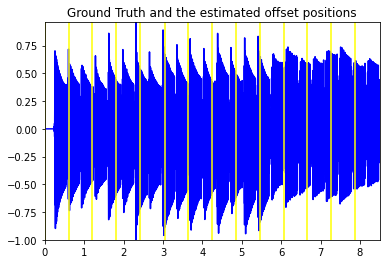

In [ ]:
rms, output=calculate_offset(yellow,0.4,frameSize,hopSize)
plt.plot(np.arange(yellow.size)/float(fs), yellow,'b')
plt.axis([0,yellow.size/float(fs),min(yellow),max(yellow)])
print("The offset positions for Ground Truth ")
print(len(output))
print(output)
for i in output:
    plt.axvline(x=i, color='yellow')
plt.title("Ground Truth and the estimated offset positions")
scale_factor= (len(yellow)/len(rms))
plt.show()


The offset positions for Ground Truth 
12
[0.         0.90557826 1.555737   2.2987754  2.9024944  3.622313
 4.2956915  5.3173695  6.0139685  7.058866   7.732245   8.452064  ]


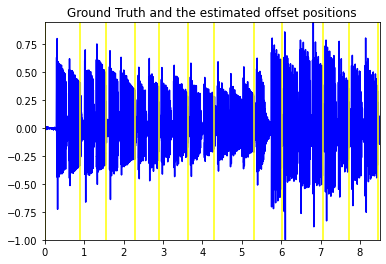

In [ ]:
rms, output=calculate_offset(yellow1,0.1,frameSize,hopSize)
plt.plot(np.arange(yellow1.size)/float(fs), yellow1,'b')
plt.axis([0,yellow1.size/float(fs),min(yellow1),max(yellow1)])
print("The offset positions for Ground Truth ")
print(len(output))
print(output)
for i in output:
    plt.axvline(x=i, color='yellow')
plt.title("Ground Truth and the estimated offset positions")
scale_factor= (len(yellow1)/len(rms))
plt.show()
